<a href="https://colab.research.google.com/github/saiful1604008/Thesis/blob/main/Final_thesis_CNN_model_(300_300).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir = "/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/"
num_classes = 2

In [3]:
datagen = ImageDataGenerator(
    rescale = 1.0/255,
    validation_split = 0.20
)

train_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (300,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = True,
    subset = 'training',
    class_mode = 'binary'
)

valid_gen = datagen.flow_from_directory(
    directory= data_dir,
    target_size = (300,300),
    batch_size = 30,
    color_mode = 'rgb',
    shuffle = False,
    subset = 'validation',
    class_mode = 'binary'

)

Found 812 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [4]:
input_shape = train_gen.image_shape
input_shape

(300, 300, 3)

In [5]:
model = Sequential([
                    Conv2D(16,(6,6),
                            strides=2,
                            activation="relu",
                            padding='same',
                            input_shape=input_shape),
                    MaxPooling2D(pool_size = 2,strides=1),
                    Dropout(0.5),
                    Conv2D(32,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    Conv2D(64,(3,3),
                           strides=1,
                           padding="same",
                           activation="relu"),
                    MaxPooling2D(pool_size = 2,strides = 1),
                    Dropout(0.5),
                    
                    Flatten(),
                    Dense(256,activation = 'relu'),
                    Dropout(0.5),
                    #Dense(512,activation = 'relu'),
                    #Dropout(0.5),
                    Dense(2,activation = 'softmax')
                    
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      1744      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 148, 148, 32)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 148, 148, 32)      0

In [7]:
callback_list = EarlyStopping(monitor = 'val_loss',
                              patience = 20,
                              restore_best_weights=True)

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.0005),
              metrics = ['accuracy'])

In [9]:
Epoch = 200
batchSize = 32

history = model.fit(train_gen,
                    batch_size = batchSize,
                    epochs=Epoch,
                    callbacks=[callback_list],
                    validation_data=valid_gen,
                    verbose = 1)

Epoch 1/200
28/28 [==============================] - 267s 9s/step - loss: 54.3372 - accuracy: 0.5874 - val_loss: 0.5809 - val_accuracy: 0.4975
Epoch 2/200
28/28 [==============================] - 243s 9s/step - loss: 0.4843 - accuracy: 0.8288 - val_loss: 0.6034 - val_accuracy: 0.8060
Epoch 3/200
28/28 [==============================] - 237s 8s/step - loss: 0.3025 - accuracy: 0.9089 - val_loss: 0.5852 - val_accuracy: 0.8159
Epoch 4/200
28/28 [==============================] - 238s 9s/step - loss: 0.2191 - accuracy: 0.9224 - val_loss: 0.5829 - val_accuracy: 0.8209
Epoch 5/200
28/28 [==============================] - 238s 9s/step - loss: 0.1617 - accuracy: 0.9298 - val_loss: 0.5504 - val_accuracy: 0.7264
Epoch 6/200
28/28 [==============================] - 237s 9s/step - loss: 0.1612 - accuracy: 0.9335 - val_loss: 0.5338 - val_accuracy: 0.7065
Epoch 7/200
28/28 [==============================] - 243s 9s/step - loss: 0.1823 - accuracy: 0.9236 - val_loss: 0.5364 - val_accuracy: 0.6915
Epoch

In [19]:
model.evaluate(valid_gen)

7/7 [==============================] - 10s 1s/step - loss: 0.2135 - accuracy: 0.9104


[0.21351130306720734, 0.9104477763175964]

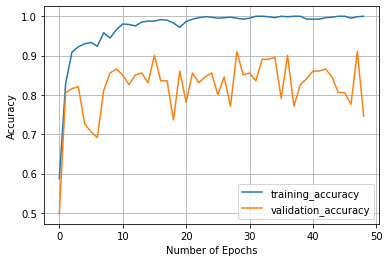

In [20]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

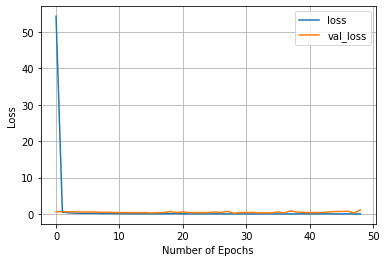

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = []

for key in train_gen.class_indices:
    target_names.append(key)


y_pred = model.predict_generator(valid_gen)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(valid_gen.classes, y_pred)
print (cm)

print('\n')

print('Classification Report')
print(classification_report(valid_gen.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  if __name__ == '__main__':


Confusion Matrix
[[88 13]
 [ 5 95]]


Classification Report
              precision    recall  f1-score   support

      Normal       0.95      0.87      0.91       101
     Seizure       0.88      0.95      0.91       100

    accuracy                           0.91       201
   macro avg       0.91      0.91      0.91       201
weighted avg       0.91      0.91      0.91       201



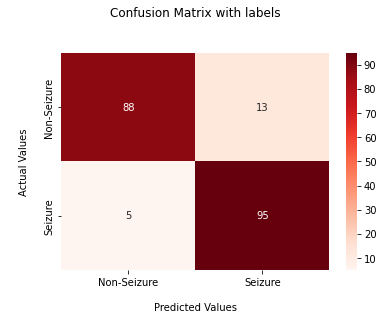

In [23]:
ax = sns.heatmap(cm, annot=True, cmap = 'Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('\nActual Values\n');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-Seizure','Seizure'])
ax.yaxis.set_ticklabels(['Non-Seizure','Seizure'])

## Display the visualization of the Confusion Matrix.
plt.show()

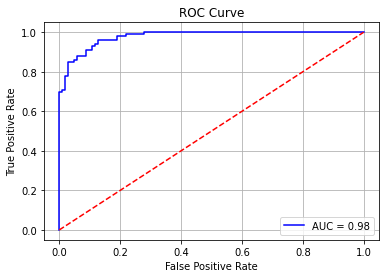

In [24]:
import sklearn.metrics as metrics
y_pred_keras = model.predict(valid_gen)
preds = y_pred_keras[:,1]
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(valid_gen.classes, preds)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('ROC Curve')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.show()

In [25]:
from tensorflow.keras.preprocessing import image

In [26]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_1.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_2.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_3.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_4.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_5.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_6.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_7.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_8.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_9.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_10.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_11.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_12.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_13.PNG
/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/chb01_n_14.PNG
/

In [28]:
def predictImage(file_name):
    image1 = image.load_img(file_name,target_size=(300,300))
    plt.imshow(image1)
    Y = image.img_to_array(image1)
    X = np.expand_dims(Y,axis=0)
    value = model.predict(X)
    v = np.argmax(value)
    print(v)
    if v == 1: 
        plt.xlabel("Seizure",fontsize= 20)
    elif v == 0:
        
        plt.xlabel("Non-Seizure",fontsize= 20)

1


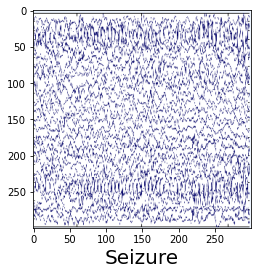

In [29]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Seizure/313.PNG')

0


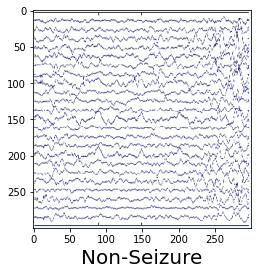

In [30]:
predictImage('/content/drive/MyDrive/EEG_Seizure_Dataset_Thesis/Normal/273.PNG')